<a href="https://colab.research.google.com/github/bellottisofia/Innovation_Adoption_Parameters/blob/main/matrix_DAY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df = pd.read_excel('/content/dataset_clean.xlsx')

In [3]:
km_mapping = {
    "I don't know":np.nan,
    'Less than 10 km': 'Less than 10 km',

    '10-19 km': '10-19 km'  ,
    '20-29 km': '20-29 km' ,

     '30-39 km' : '30-49 km',
    '40-49 km' : '30-49 km',

    '50-99 km' :'more than 50' ,
     '100-199 km': 'more than 50',

    '200 km or more': 'more than 50'
}




In [4]:
#'Less than 10 km', '10-19 km','20-29 km', '30-49 km','50 or more km'
# Supponendo che la colonna si chiami 'Education'
df['km_day'] = df['Q8'].map(km_mapping)


In [5]:

df.drop(columns=['Q8'], inplace=True)


In [6]:
df.dropna(inplace=True)

In [7]:
for col in df.columns:
    print(f"Colonna '{col}': {df[col].unique()}")

Colonna 'Q11_1': [0 1]
Colonna 'Q11_2': [0 1]
Colonna 'Q11_3': [0 1]
Colonna 'Q11_4': [1 0]
Colonna 'Q11_5': [1 0]
Colonna 'Q11_6': [0 1]
Colonna 'Q11_7': [0 1]
Colonna 'Q11_8': [1 0]
Colonna 'Q11_9': [0 1]
Colonna 'Q11_10': [0 1]
Colonna 'Q11_11': [1 0]
Colonna 'Q11_12': [0 1]
Colonna 'Q11_13': [0 1]
Colonna 'Q12_1': [0 1]
Colonna 'Q12_2': [0 1]
Colonna 'Q12_3': [1 0]
Colonna 'Q12_4': [1 0]
Colonna 'Q12_5': [0 1]
Colonna 'Q12_6': [0 1]
Colonna 'Q12_7': [0 1]
Colonna 'Q12_8': [1 0]
Colonna 'Q12_9': [0 1]
Colonna 'Q12_10': [0 1]
Colonna 'Q12_11': [1 0]
Colonna 'Q12_12': [0 1]
Colonna 'Q12_13': [0 1]
Colonna 'Q12_14': [0 1]
Colonna 'Q13_1': [0 1]
Colonna 'Q13_2': [0 1]
Colonna 'Q13_3': [1 0]
Colonna 'Q13_4': [0 1]
Colonna 'Q13_5': [1 0]
Colonna 'Q13_6': [0 1]
Colonna 'Q13_7': [0 1]
Colonna 'Q13_8': [0 1]
Colonna 'Q13_9': [1 0]
Colonna 'Q13_10': [0 1]
Colonna 'Q13_11': [0 1]
Colonna 'Q13_12': [0 1]
Colonna 'Q13_13': [1 0]
Colonna 'Q13_14': [1 0]
Colonna 'Q13_15': [0 1]
Colonna 'Q16': [   

I valori associati a risposte "Don’t know" o "Neither/nor" originariamente erano codificate con valori numerici molto elevati e che potrebbero distorcere i risultati.

Per questo motivo rendiamo queste risposte "neutrali": assegnamo dunque valore 3.

In [8]:
df.replace(99999997, 3, inplace=True)

In [9]:
for col in df.columns:
    print(f"Colonna '{col}': {df[col].unique()}")

Colonna 'Q11_1': [0 1]
Colonna 'Q11_2': [0 1]
Colonna 'Q11_3': [0 1]
Colonna 'Q11_4': [1 0]
Colonna 'Q11_5': [1 0]
Colonna 'Q11_6': [0 1]
Colonna 'Q11_7': [0 1]
Colonna 'Q11_8': [1 0]
Colonna 'Q11_9': [0 1]
Colonna 'Q11_10': [0 1]
Colonna 'Q11_11': [1 0]
Colonna 'Q11_12': [0 1]
Colonna 'Q11_13': [0 1]
Colonna 'Q12_1': [0 1]
Colonna 'Q12_2': [0 1]
Colonna 'Q12_3': [1 0]
Colonna 'Q12_4': [1 0]
Colonna 'Q12_5': [0 1]
Colonna 'Q12_6': [0 1]
Colonna 'Q12_7': [0 1]
Colonna 'Q12_8': [1 0]
Colonna 'Q12_9': [0 1]
Colonna 'Q12_10': [0 1]
Colonna 'Q12_11': [1 0]
Colonna 'Q12_12': [0 1]
Colonna 'Q12_13': [0 1]
Colonna 'Q12_14': [0 1]
Colonna 'Q13_1': [0 1]
Colonna 'Q13_2': [0 1]
Colonna 'Q13_3': [1 0]
Colonna 'Q13_4': [0 1]
Colonna 'Q13_5': [1 0]
Colonna 'Q13_6': [0 1]
Colonna 'Q13_7': [0 1]
Colonna 'Q13_8': [0 1]
Colonna 'Q13_9': [1 0]
Colonna 'Q13_10': [0 1]
Colonna 'Q13_11': [0 1]
Colonna 'Q13_12': [0 1]
Colonna 'Q13_13': [1 0]
Colonna 'Q13_14': [1 0]
Colonna 'Q13_15': [0 1]
Colonna 'Q16': [1 3

Vogliamo creare un vettore di opinioni per ogni popolazione

Q20: how your opinion about diesel and gasoline motor is changed : 1 more positive 5 more negative

Q21: how your opinion about EV is changed : 1 more positive 5 more negative

Volgiamo che 5 sia un'opinione favorevole agli EV, quindi invertiamo i valori di Q21



Q17: If you only had an electric car, how well would it suit your daily driving?
Very good 1 to Very bad 5

anche in questo caso invertiamo


In [10]:
df['Q17'] = 5- df['Q17']
df['Q21'] = 5- df['Q21']

In [11]:
df_Denmark=df.loc[df['Country']=='Denmark']
df_Norway=df.loc[df['Country']=='Norway']
df_Germany=df.loc[df['Country']=='Germany']
df_Hungary=df.loc[df['Country']=='Hungary']


In [12]:
df_NL = pd.read_csv('/content/NL_clean.csv')
df_NL['km_day'] = df_NL['Q8'].map(km_mapping)
df_NL.drop(columns=['Q8'], inplace=True)

In [13]:
countries = [df_Denmark, df_Norway, df_Germany, df_Hungary, df_NL]
order_km = ['Less than 10 km', '10-19 km', '20-29 km', '30-49 km', 'more than 50']
for country in countries:
  country['km_day'] = pd.Categorical(country['km_day'], categories=order_km, ordered=True)

<ipython-input-13-4d46733fbae9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country['km_day'] = pd.Categorical(country['km_day'], categories=order_km, ordered=True)


<ipython-input-14-c56796228a05>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_matrix_Denmark = df_Denmark.groupby(['Lftcat', 'km_day']).size().unstack(fill_value=0)
<ipython-input-14-c56796228a05>:45: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


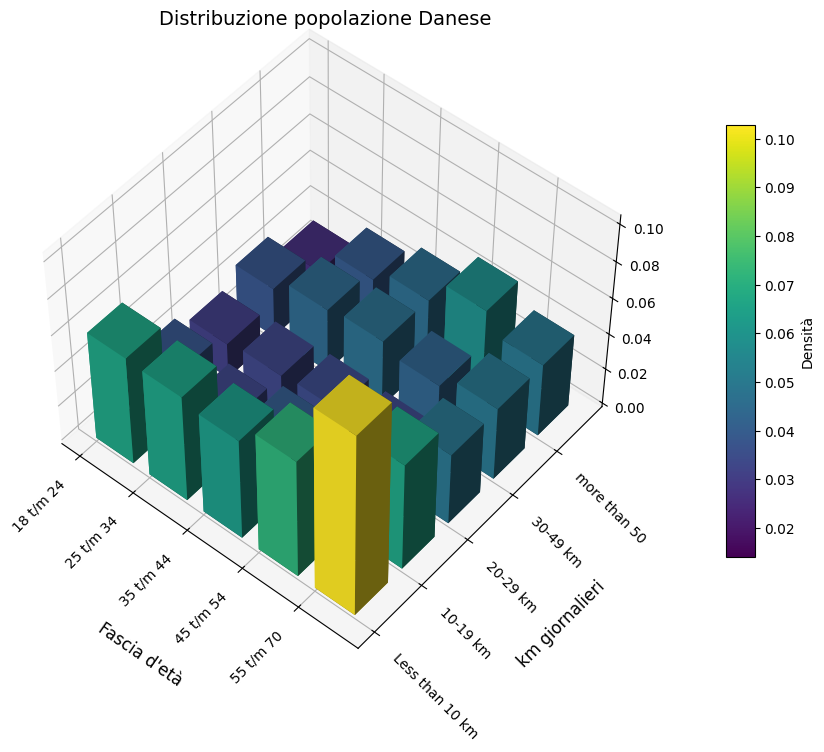

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
# numero assoluto di persone per combinazione (età, km)
grouped_matrix_Denmark = df_Denmark.groupby(['Lftcat', 'km_day']).size().unstack(fill_value=0)

# Matrice dei valori assoluti
Z = grouped_matrix_Denmark.values.astype(float)
Z = Z / Z.sum()

# Coordinate
xpos, ypos = np.meshgrid(np.arange(Z.shape[0]), np.arange(Z.shape[1]), indexing="xy")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = np.zeros_like(xpos)
dz = Z.T.ravel()

# Colori
colors = cm.viridis(dz / dz.max())

# Grafico
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=50, azim=-50)

ax.bar3d(xpos, ypos, zpos, dx=0.7, dy=0.7, dz=dz, color=colors, zsort='average')

# Etichette assi
ax.set_xticks(np.arange(Z.shape[0]))
ax.set_xticklabels(grouped_matrix_Denmark.index, rotation=45, ha='right', fontsize=10)

ax.set_yticks(np.arange(Z.shape[1]))
ax.set_yticklabels(grouped_matrix_Denmark.columns,  rotation=-45,  ha='left',fontsize=10)

ax.set_xlabel('Fascia d\'età', labelpad=40, fontsize=12)
ax.set_ylabel('km giornalieri', labelpad=40, fontsize=12)
ax.set_zlabel('')
ax.set_title('Distribuzione popolazione Danese', fontsize=14)

# Colorbar
mappable = cm.ScalarMappable(cmap='viridis')
mappable.set_array(dz)
fig.colorbar(mappable, ax=ax, shrink=0.7, aspect=15, pad=0.1, label='Densità')

plt.tight_layout()
plt.show()


In [15]:
# frazione per popolazione
grouped_fractions_Denmark = df_Denmark.groupby(['Lftcat', 'km_day']).size() / len(df_Denmark)

grouped_fractions_Denmark

<ipython-input-15-dbbde21d0b10>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_fractions_Denmark = df_Denmark.groupby(['Lftcat', 'km_day']).size() / len(df_Denmark)


Lftcat     km_day         
18 t/m 24  Less than 10 km    0.060392
           10-19 km           0.027451
           20-29 km           0.019608
           30-49 km           0.027451
           more than 50       0.014118
25 t/m 34  Less than 10 km    0.059608
           10-19 km           0.021961
           20-29 km           0.021961
           30-49 km           0.035294
           more than 50       0.029020
35 t/m 44  Less than 10 km    0.056471
           10-19 km           0.029804
           20-29 km           0.023529
           30-49 km           0.037647
           more than 50       0.036863
45 t/m 54  Less than 10 km    0.066667
           10-19 km           0.040784
           20-29 km           0.022745
           30-49 km           0.032941
           more than 50       0.050980
55 t/m 70  Less than 10 km    0.102745
           10-19 km           0.060392
           20-29 km           0.040000
           30-49 km           0.040784
           more than 50       0.040784
dtype: float64

In [16]:
df_Denmark.groupby(['Lftcat', 'km_day']).size()

<ipython-input-16-f747a80a393c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_Denmark.groupby(['Lftcat', 'km_day']).size()


Lftcat     km_day         
18 t/m 24  Less than 10 km     77
           10-19 km            35
           20-29 km            25
           30-49 km            35
           more than 50        18
25 t/m 34  Less than 10 km     76
           10-19 km            28
           20-29 km            28
           30-49 km            45
           more than 50        37
35 t/m 44  Less than 10 km     72
           10-19 km            38
           20-29 km            30
           30-49 km            48
           more than 50        47
45 t/m 54  Less than 10 km     85
           10-19 km            52
           20-29 km            29
           30-49 km            42
           more than 50        65
55 t/m 70  Less than 10 km    131
           10-19 km            77
           20-29 km            51
           30-49 km            52
           more than 50        52
dtype: int64

In [17]:
# 2.colonne da mediare
columns_to_average = [col for col in df_Denmark.columns if col.startswith(('Q11_', 'Q12_', 'Q13_', 'Q17', 'Q18_', 'Q20', 'Q21'))]

# 3. Raggruppamento per fascia d'età e km giornalieri, calcolo media
grouped_matrix_Denmark = df_Denmark.groupby(['Lftcat', 'km_day'])[columns_to_average].mean()
grouped_matrix_Denmark['popolazione'] = grouped_matrix_Denmark.index.get_level_values('Lftcat') + '_' + grouped_matrix_Denmark.index.get_level_values('km_day').astype(str)

matrix_Denmark = grouped_matrix_Denmark.reset_index(drop=True)
matrix_Denmark = matrix_Denmark[['popolazione'] + [col for col in matrix_Denmark.columns if col != 'popolazione']]



<ipython-input-17-1c0e472d95c8>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_matrix_Denmark = df_Denmark.groupby(['Lftcat', 'km_day'])[columns_to_average].mean()


In [18]:

columns_to_rescale = [col for col in df.columns if col.startswith(( 'Q17', 'Q18_', 'Q20', 'Q21'))]

In [19]:
for column in columns_to_rescale:
  matrix_Denmark[column] = (matrix_Denmark[column] - 1) / 4
matrix_Denmark.to_csv("matrix_Denmark.csv", index=False)

<ipython-input-20-f9dd9e0a5b36>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_matrix_Germany = df_Germany.groupby(['Lftcat', 'km_day']).size().unstack(fill_value=0)
<ipython-input-20-f9dd9e0a5b36>:42: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


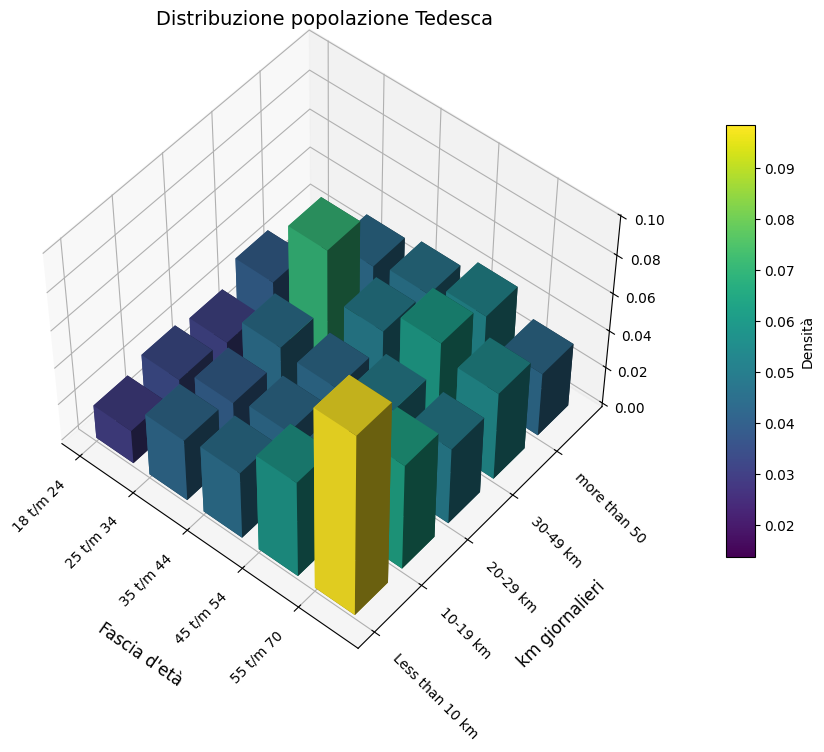

In [20]:

# numero assoluto di persone per combinazione (età, km)
grouped_matrix_Germany = df_Germany.groupby(['Lftcat', 'km_day']).size().unstack(fill_value=0)

# Matrice dei valori assoluti
Z = grouped_matrix_Germany.values.astype(float)
Z = Z / Z.sum()

# Coordinate
xpos, ypos = np.meshgrid(np.arange(Z.shape[0]), np.arange(Z.shape[1]), indexing="xy")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = np.zeros_like(xpos)
dz = Z.T.ravel()

# Colori basati su densità relativa
colors = cm.viridis(dz / dz.max())

# Grafico
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=50, azim=-50)

ax.bar3d(xpos, ypos, zpos, dx=0.7, dy=0.7, dz=dz, color=colors, zsort='average')

# Etichette assi
ax.set_xticks(np.arange(Z.shape[0]))
ax.set_xticklabels(grouped_matrix_Germany.index, rotation=45, ha='right', fontsize=10)

ax.set_yticks(np.arange(Z.shape[1]))
ax.set_yticklabels(grouped_matrix_Germany.columns,  rotation=-45,  ha='left',fontsize=10)

ax.set_xlabel('Fascia d\'età', labelpad=40, fontsize=12)
ax.set_ylabel('km giornalieri', labelpad=40, fontsize=12)
ax.set_zlabel('')
ax.set_title('Distribuzione popolazione Tedesca', fontsize=14)

# Colorbar
mappable = cm.ScalarMappable(cmap='viridis')
mappable.set_array(dz)
fig.colorbar(mappable, ax=ax, shrink=0.7, aspect=15, pad=0.1, label='Densità')

plt.tight_layout()
plt.show()


In [21]:


grouped_fractions_Germany = df_Germany.groupby(['Lftcat', 'km_day']).size() / len(df_Germany)

grouped_fractions_Germany

<ipython-input-21-7dfd111f607c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_fractions_Germany = df_Germany.groupby(['Lftcat', 'km_day']).size() / len(df_Germany)


Lftcat     km_day         
18 t/m 24  Less than 10 km    0.018222
           10-19 km           0.022595
           20-29 km           0.019679
           30-49 km           0.029883
           more than 50       0.013848
25 t/m 34  Less than 10 km    0.033528
           10-19 km           0.029883
           20-29 km           0.036443
           30-49 km           0.065598
           more than 50       0.034985
35 t/m 44  Less than 10 km    0.036443
           10-19 km           0.034257
           20-29 km           0.034257
           30-49 km           0.041545
           more than 50       0.038630
45 t/m 54  Less than 10 km    0.052478
           10-19 km           0.035714
           20-29 km           0.042274
           30-49 km           0.054665
           more than 50       0.045918
55 t/m 70  Less than 10 km    0.098397
           10-19 km           0.057580
           20-29 km           0.041545
           30-49 km           0.047376
           more than 50       0.034257
dtype: float64

In [22]:
# 2. colonne da mediare
columns_to_average = [col for col in df_Germany.columns if col.startswith(('Q11_', 'Q12_', 'Q13_', 'Q17', 'Q18_', 'Q20', 'Q21'))]

# 3. Raggruppamento per fascia d'età e km giornalieri, e calcola la media
grouped_matrix_Germany = df_Germany.groupby(['Lftcat', 'km_day'])[columns_to_average].mean()
grouped_matrix_Germany['popolazione'] = grouped_matrix_Germany.index.get_level_values('Lftcat') + '_' + grouped_matrix_Germany.index.get_level_values('km_day').astype(str)

matrix_Germany = grouped_matrix_Germany.reset_index(drop=True)
matrix_Germany = matrix_Germany[['popolazione'] + [col for col in matrix_Germany.columns if col != 'popolazione']]


<ipython-input-22-bc36b7929fa3>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_matrix_Germany = df_Germany.groupby(['Lftcat', 'km_day'])[columns_to_average].mean()


In [23]:
for column in columns_to_rescale:
  matrix_Germany[column] = (matrix_Germany[column] - 1) / 4
matrix_Germany.to_csv("matrix_Germany.csv", index=False)

<ipython-input-24-54dbf94e0caf>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_matrix_Norway = df_Norway.groupby(['Lftcat', 'km_day']).size().unstack(fill_value=0)
<ipython-input-24-54dbf94e0caf>:42: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


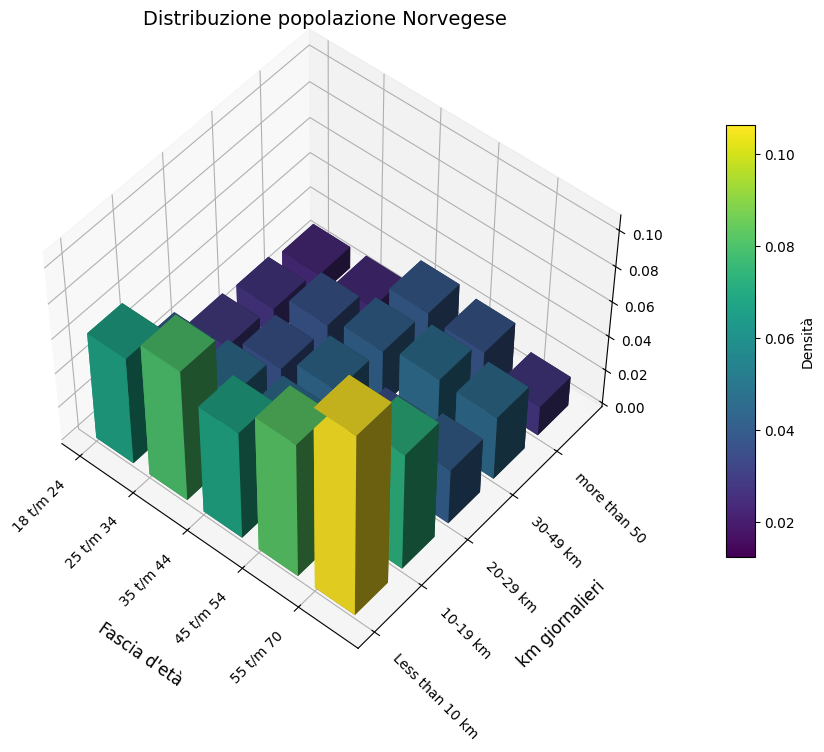

In [24]:


#numero assoluto di persone per combinazione (età, km)
grouped_matrix_Norway = df_Norway.groupby(['Lftcat', 'km_day']).size().unstack(fill_value=0)

# Matrice dei valori assoluti
Z = grouped_matrix_Norway.values.astype(float)
Z = Z / Z.sum()

# Coordinate
xpos, ypos = np.meshgrid(np.arange(Z.shape[0]), np.arange(Z.shape[1]), indexing="xy")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = np.zeros_like(xpos)
dz = Z.T.ravel()

# Colori basati su densità relativa
colors = cm.viridis(dz / dz.max())

# Grafico
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=50, azim=-50)

ax.bar3d(xpos, ypos, zpos, dx=0.7, dy=0.7, dz=dz, color=colors, zsort='average')

# Etichette assi
ax.set_xticks(np.arange(Z.shape[0]))
ax.set_xticklabels(grouped_matrix_Norway.index, rotation=45, ha='right', fontsize=10)

ax.set_yticks(np.arange(Z.shape[1]))
ax.set_yticklabels(grouped_matrix_Norway.columns,  rotation=-45,  ha='left',fontsize=10)

ax.set_xlabel('Fascia d\'età', labelpad=40, fontsize=12)
ax.set_ylabel('km giornalieri', labelpad=40, fontsize=12)
ax.set_zlabel('')
ax.set_title('Distribuzione popolazione Norvegese', fontsize=14)

# Colorbar
mappable = cm.ScalarMappable(cmap='viridis')
mappable.set_array(dz)
fig.colorbar(mappable, ax=ax, shrink=0.7, aspect=15, pad=0.1, label='Densità')

plt.tight_layout()
plt.show()



In [25]:

grouped_fractions_Norway = df_Norway.groupby(['Lftcat', 'km_day']).size() / len(df_Norway)

grouped_fractions_Norway

<ipython-input-25-4589dec07100>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_fractions_Norway = df_Norway.groupby(['Lftcat', 'km_day']).size() / len(df_Norway)


Lftcat     km_day         
18 t/m 24  Less than 10 km    0.062156
           10-19 km           0.032258
           20-29 km           0.018883
           30-49 km           0.016522
           more than 50       0.012589
25 t/m 34  Less than 10 km    0.076318
           10-19 km           0.036979
           20-29 km           0.026751
           30-49 km           0.027537
           more than 50       0.013375
35 t/m 44  Less than 10 km    0.062943
           10-19 km           0.036979
           20-29 km           0.035405
           30-49 km           0.033045
           more than 50       0.030685
45 t/m 54  Less than 10 km    0.078678
           10-19 km           0.045633
           20-29 km           0.025964
           30-49 km           0.037766
           more than 50       0.028324
55 t/m 70  Less than 10 km    0.106216
           10-19 km           0.068450
           20-29 km           0.032258
           30-49 km           0.036979
           more than 50       0.017309
dtype: float64

In [26]:
# 2. colonne da mediare
columns_to_average = [col for col in df_Norway.columns if col.startswith(('Q11_', 'Q12_', 'Q13_', 'Q17', 'Q18_', 'Q20', 'Q21'))]

# 3. Raggruppamento per fascia d'età e km giornalieri, e calcola la media
grouped_matrix_Norway = df_Norway.groupby(['Lftcat', 'km_day'])[columns_to_average].mean()
grouped_matrix_Norway['popolazione'] = grouped_matrix_Norway.index.get_level_values('Lftcat') + '_' + grouped_matrix_Norway.index.get_level_values('km_day').astype(str)

matrix_Norway = grouped_matrix_Norway.reset_index(drop=True)
matrix_Norway = matrix_Norway[['popolazione'] + [col for col in matrix_Norway.columns if col != 'popolazione']]


<ipython-input-26-2cf7b844ec88>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_matrix_Norway = df_Norway.groupby(['Lftcat', 'km_day'])[columns_to_average].mean()


In [27]:
for column in columns_to_rescale:
  matrix_Norway[column] = (matrix_Norway[column] - 1) / 4
matrix_Norway.to_csv("matrix_Norway.csv", index=False)

<ipython-input-28-c7c95a2b521f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_matrix_Hungary = df_Hungary.groupby(['Lftcat', 'km_day']).size().unstack(fill_value=0)
<ipython-input-28-c7c95a2b521f>:42: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


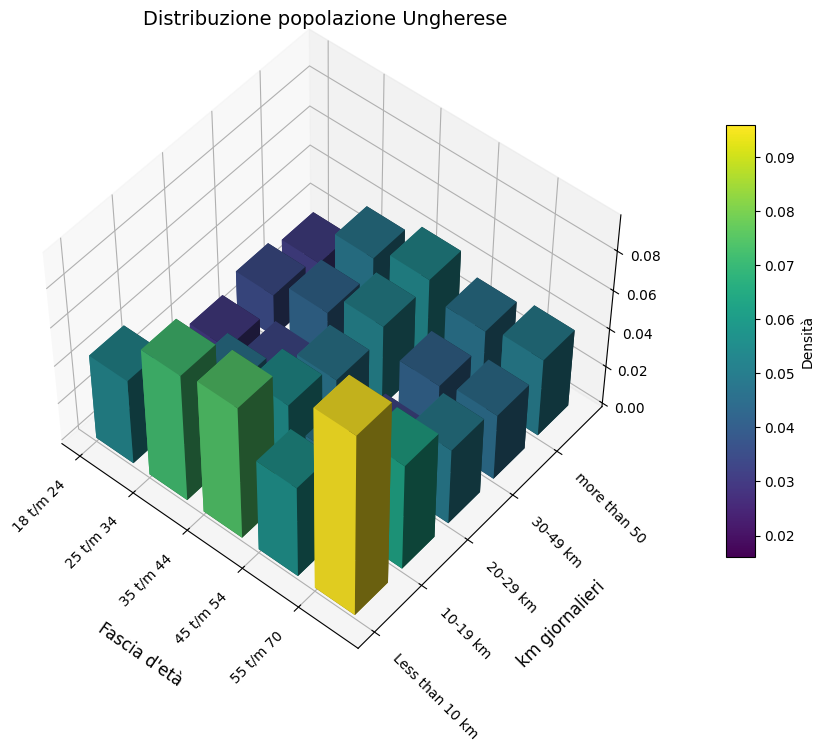

In [28]:


# numero assoluto di persone per combinazione (età, km)
grouped_matrix_Hungary = df_Hungary.groupby(['Lftcat', 'km_day']).size().unstack(fill_value=0)

# Matrice dei valori assoluti
Z = grouped_matrix_Hungary.values.astype(float)
Z = Z / Z.sum()

# Coordinate
xpos, ypos = np.meshgrid(np.arange(Z.shape[0]), np.arange(Z.shape[1]), indexing="xy")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = np.zeros_like(xpos)
dz = Z.T.ravel()

# Colori basati su densità relativa
colors = cm.viridis(dz / dz.max())

# Grafico
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=50, azim=-50)

ax.bar3d(xpos, ypos, zpos, dx=0.7, dy=0.7, dz=dz, color=colors, zsort='average')

# Etichette assi
ax.set_xticks(np.arange(Z.shape[0]))
ax.set_xticklabels(grouped_matrix_Hungary.index, rotation=45, ha='right', fontsize=10)

ax.set_yticks(np.arange(Z.shape[1]))
ax.set_yticklabels(grouped_matrix_Hungary.columns,  rotation=-45,  ha='left',fontsize=10)

ax.set_xlabel('Fascia d\'età', labelpad=40, fontsize=12)
ax.set_ylabel('km giornalieri', labelpad=40, fontsize=12)
ax.set_zlabel('')
ax.set_title('Distribuzione popolazione Ungherese', fontsize=14)

# Colorbar
mappable = cm.ScalarMappable(cmap='viridis')
mappable.set_array(dz)
fig.colorbar(mappable, ax=ax, shrink=0.7, aspect=15, pad=0.1, label='Densità')

plt.tight_layout()
plt.show()



In [29]:

grouped_fractions_Hungary = df_Hungary.groupby(['Lftcat', 'km_day']).size() / len(df_Hungary)

grouped_fractions_Hungary


<ipython-input-29-b7abd2b6f547>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_fractions_Hungary = df_Hungary.groupby(['Lftcat', 'km_day']).size() / len(df_Hungary)


Lftcat     km_day         
18 t/m 24  Less than 10 km    0.044479
           10-19 km           0.022239
           20-29 km           0.016104
           30-49 km           0.022239
           more than 50       0.017638
25 t/m 34  Less than 10 km    0.066718
           10-19 km           0.036810
           20-29 km           0.020706
           30-49 km           0.031442
           more than 50       0.038344
35 t/m 44  Less than 10 km    0.069785
           10-19 km           0.047546
           20-29 km           0.037577
           30-49 km           0.042945
           more than 50       0.045245
45 t/m 54  Less than 10 km    0.048313
           10-19 km           0.037577
           20-29 km           0.019939
           30-49 km           0.030675
           more than 50       0.036810
55 t/m 70  Less than 10 km    0.095859
           10-19 km           0.055982
           20-29 km           0.039877
           30-49 km           0.034509
           more than 50       0.040644
dtype: float64

In [30]:
# 2.colonne da mediare
columns_to_average = [col for col in df_Hungary.columns if col.startswith(('Q11_', 'Q12_', 'Q13_', 'Q17', 'Q18_', 'Q20', 'Q21'))]

# 3. Raggruppamento per fascia d'età e km giornalieri, e calcola la media
grouped_matrix_Hungary = df_Hungary.groupby(['Lftcat', 'km_day'])[columns_to_average].mean()
# 4. Crea una nuova colonna con il nome popolazione unendo Lftcat e km_day
grouped_matrix_Hungary['popolazione'] = grouped_matrix_Hungary.index.get_level_values('Lftcat') + '_' + grouped_matrix_Hungary.index.get_level_values('km_day').astype(str)

matrix_Hungary = grouped_matrix_Hungary.reset_index(drop=True)
matrix_Hungary = matrix_Hungary[['popolazione'] + [col for col in matrix_Hungary.columns if col != 'popolazione']]


<ipython-input-30-c001348c77af>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_matrix_Hungary = df_Hungary.groupby(['Lftcat', 'km_day'])[columns_to_average].mean()


In [31]:
for column in columns_to_rescale:
  matrix_Hungary[column] = (matrix_Hungary[column] - 1) / 4
matrix_Hungary.to_csv("matrix_Hungary.csv", index=False)

In [32]:
df_NL.replace(99999997, 3, inplace=True)

<ipython-input-33-67715d21876f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_matrix_NL = df_NL.groupby(['Lftcat', 'km_day']).size().unstack(fill_value=0)
<ipython-input-33-67715d21876f>:42: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


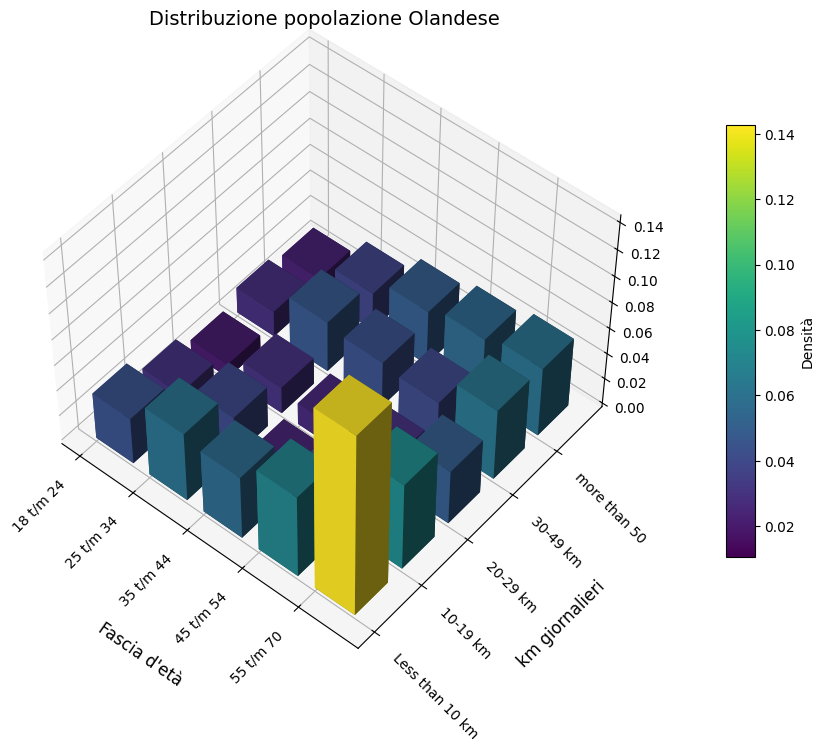

In [33]:

# numero assoluto di persone per combinazione (età, km)
grouped_matrix_NL = df_NL.groupby(['Lftcat', 'km_day']).size().unstack(fill_value=0)

# Matrice dei valori assoluti
Z = grouped_matrix_NL.values.astype(float)
Z = Z / Z.sum()

# Coordinate
xpos, ypos = np.meshgrid(np.arange(Z.shape[0]), np.arange(Z.shape[1]), indexing="xy")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = np.zeros_like(xpos)
dz = Z.T.ravel()

# Colori basati su densità relativa
colors = cm.viridis(dz / dz.max())

# Grafico
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=50, azim=-50)

ax.bar3d(xpos, ypos, zpos, dx=0.7, dy=0.7, dz=dz, color=colors, zsort='average')

# Etichette assi
ax.set_xticks(np.arange(Z.shape[0]))
ax.set_xticklabels(grouped_matrix_NL.index, rotation=45, ha='right', fontsize=10)

ax.set_yticks(np.arange(Z.shape[1]))
ax.set_yticklabels(grouped_matrix_NL.columns,  rotation=-45,  ha='left',fontsize=10)

ax.set_xlabel('Fascia d\'età', labelpad=40, fontsize=12)
ax.set_ylabel('km giornalieri', labelpad=40, fontsize=12)
ax.set_zlabel('')
ax.set_title('Distribuzione popolazione Olandese', fontsize=14)

# Colorbar
mappable = cm.ScalarMappable(cmap='viridis')
mappable.set_array(dz)
fig.colorbar(mappable, ax=ax, shrink=0.7, aspect=15, pad=0.1, label='Densità')

plt.tight_layout()
plt.show()


In [34]:

grouped_fractions_NL = df_NL.groupby(['Lftcat', 'km_day']).size() / len(df_NL)

grouped_fractions_NL

<ipython-input-34-fb5868c1cc60>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_fractions_NL = df_NL.groupby(['Lftcat', 'km_day']).size() / len(df_NL)


Lftcat     km_day         
18 t/m 24  Less than 10 km    0.030264
           10-19 km           0.018030
           20-29 km           0.009015
           30-49 km           0.016742
           more than 50       0.011590
25 t/m 34  Less than 10 km    0.045074
           10-19 km           0.026401
           20-29 km           0.017386
           30-49 km           0.032840
           more than 50       0.024469
35 t/m 44  Less than 10 km    0.041211
           10-19 km           0.012234
           20-29 km           0.014166
           30-49 km           0.029620
           more than 50       0.035415
45 t/m 54  Less than 10 km    0.054089
           10-19 km           0.032840
           20-29 km           0.017386
           30-49 km           0.027044
           more than 50       0.040567
55 t/m 70  Less than 10 km    0.119768
           10-19 km           0.057308
           20-29 km           0.035415
           30-49 km           0.046362
           more than 50       0.045074
dtype: float64

In [35]:
columns_to_average = [col for col in df_NL.columns if col.startswith(('Q11_', 'Q12_', 'Q13_', 'Q17', 'Q18_', 'Q20', 'Q21'))]

# 3. Raggruppamento per fascia d'età e km giornalieri, e calcola la media
grouped_matrix_NL = df_NL.groupby(['Lftcat', 'km_day'])[columns_to_average].mean()

# 4. nuova colonna con il nome popolazione unendo Lftcat e km_day
grouped_matrix_NL['popolazione'] = grouped_matrix_NL.index.get_level_values('Lftcat') + '_' + grouped_matrix_NL.index.get_level_values('km_day').astype(str)

matrix_NL = grouped_matrix_NL.reset_index(drop=True)
matrix_NL = matrix_NL[['popolazione'] + [col for col in matrix_NL.columns if col != 'popolazione']]



<ipython-input-35-ff59cd2b9fa8>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_matrix_NL = df_NL.groupby(['Lftcat', 'km_day'])[columns_to_average].mean()


In [36]:
for column in columns_to_rescale:
  matrix_NL[column] = (matrix_NL[column] - 1) / 4
matrix_NL.to_csv("matrix_NL.csv", index=False)